In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


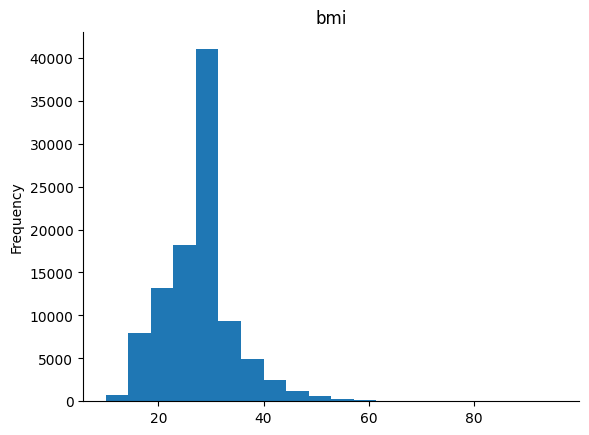

In [ ]:
data['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

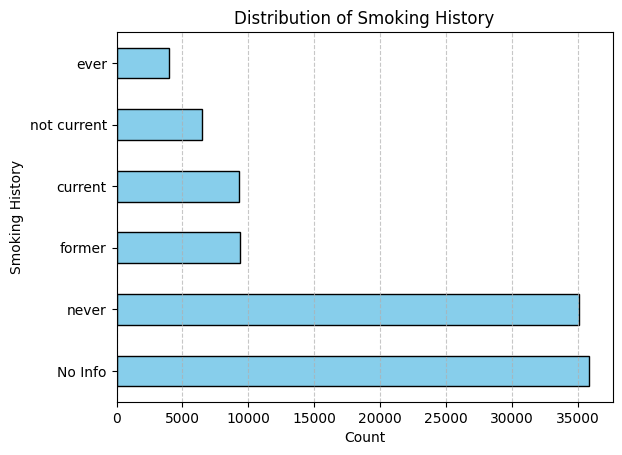

In [ ]:
smoking_counts = data['smoking_history'].value_counts()
smoking_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Distribution of Smoking History')
plt.xlabel('Count')
plt.ylabel('Smoking History')
plt.grid(axis='x', linestyle='--', alpha=0.7)

In [ ]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
data.duplicated().sum()

3854

In [ ]:
data.drop_duplicates(keep='first',inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


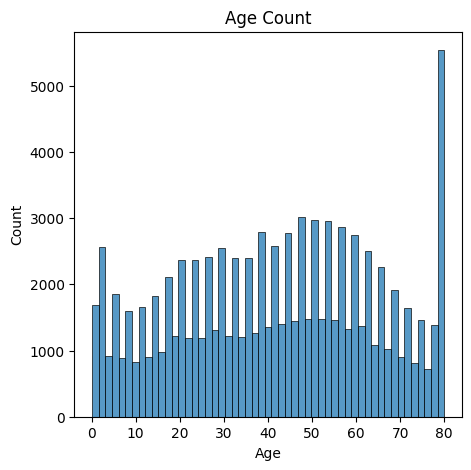

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data['age'])
plt.title('Age Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Outlier tespiti yapılması**
* IQR yöntemi

In [ ]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

outliers_info = {}
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    outliers_info[column] = outliers

data['bmi'].count(),outliers_info['bmi'].count(),outliers_info

(96146,
 5354,
 {'age': Series([], Name: age, dtype: float64),
  'bmi': 11       54.70
  39       56.43
  59       63.48
  93       55.61
  98       50.13
           ...  
  99933    13.34
  99948    39.62
  99953    60.52
  99960    45.15
  99993    40.69
  Name: bmi, Length: 5354, dtype: float64,
  'HbA1c_level': 40       9.0
  55       9.0
  59       8.8
  135      9.0
  169      9.0
          ... 
  99523    8.8
  99663    9.0
  99706    9.0
  99740    9.0
  99929    8.8
  Name: HbA1c_level, Length: 1312, dtype: float64,
  'blood_glucose_level': 38       260
  94       300
  104      280
  125      280
  142      300
          ... 
  99763    280
  99826    300
  99867    300
  99938    300
  99957    280
  Name: blood_glucose_level, Length: 2031, dtype: int64})

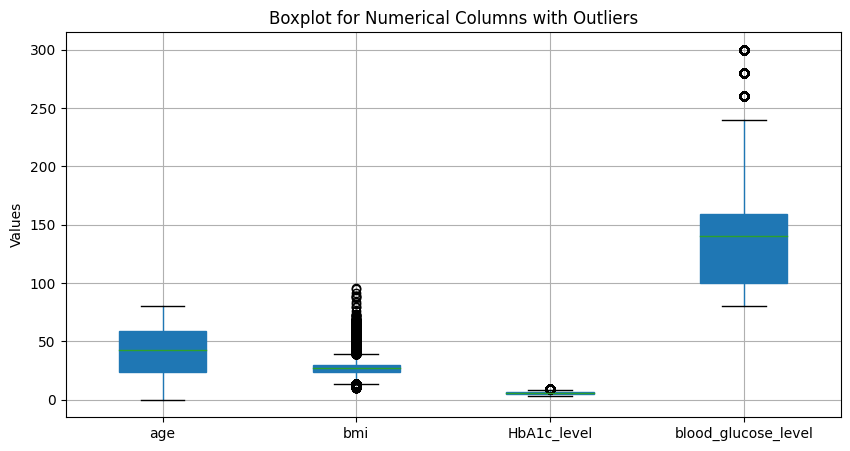

In [ ]:
plt.figure(figsize=(10, 5))
data[numerical_columns].boxplot(patch_artist=True)

plt.title('Boxplot for Numerical Columns with Outliers')
plt.ylabel('Values')

plt.show()

In [ ]:
data.iloc[59:101]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
59,Female,67.0,0,0,never,63.48,8.8,155,1
60,Male,44.0,1,0,current,27.86,6.6,145,0
61,Female,21.0,0,0,not current,26.10,5.8,140,0
62,Female,30.0,0,0,current,27.32,6.5,158,0
63,Female,59.0,0,0,former,27.32,6.0,159,0
64,Female,27.0,0,0,not current,30.22,5.7,100,0
65,Female,59.0,0,1,ever,23.11,6.5,200,0
66,Female,19.0,0,0,not current,27.32,5.7,145,0
67,Female,13.0,0,0,No Info,28.16,5.0,90,0
68,Male,56.0,0,0,never,26.78,4.8,200,0


In [ ]:
5354*100/96146

5.568614398934953

Veri setinin %5 'i outlier

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
data.drop('gender',axis=1,inplace=True)
data['smoking_history']=le.fit_transform(data['smoking_history'])

In [ ]:
sc=StandardScaler()
data['blood_glucose_level']=sc.fit_transform(data[['blood_glucose_level']])
data['bmi']=sc.fit_transform(data[['bmi']])
data['age']=sc.fit_transform(data[['age']])
data['HbA1c_level']=sc.fit_transform(data[['HbA1c_level']])

In [ ]:
data.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.700840,0,1,4,-0.314947,0.994563,0.043554,0
1,0.543372,0,0,0,-0.000216,0.994563,-1.423096,0
2,-0.614096,0,0,4,-0.000216,0.155970,0.483549,0
3,-0.257952,0,0,1,-0.572051,-0.496269,0.410216,0
4,1.522768,1,1,1,-1.061141,-0.682623,0.410216,0


In [ ]:
data.corr()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257305,0.238451,0.241128,0.344797,0.106719,0.114317,0.264927
hypertension,0.257305,1.000000,0.119982,0.087892,0.148111,0.081441,0.084834,0.195710
heart_disease,0.238451,0.119982,1.000000,0.023608,0.061376,0.068140,0.070832,0.170711
smoking_history,0.241128,0.087892,0.023608,1.000000,0.183840,0.035518,0.038259,0.088471
bmi,0.344797,0.148111,0.061376,0.183840,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.106719,0.081441,0.068140,0.035518,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.114317,0.084834,0.070832,0.038259,0.092543,0.171615,1.000000,0.424336
diabetes,0.264927,0.195710,0.170711,0.088471,0.214932,0.406408,0.424336,1.000000


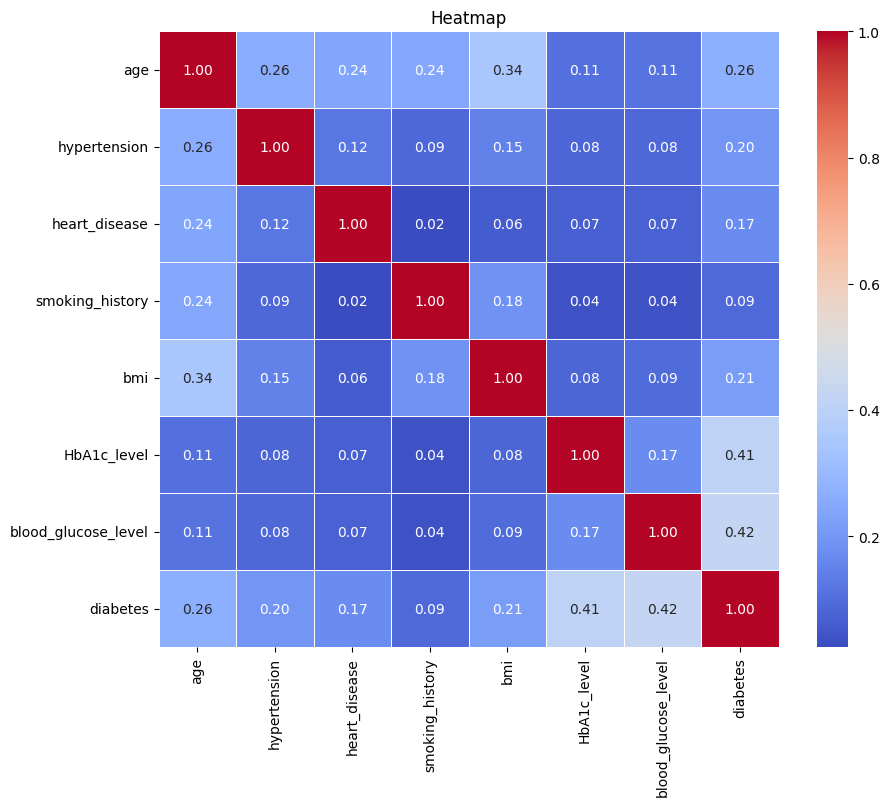

In [ ]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Heatmap')
plt.show()

Correlation Matrix:
                          age       bmi  HbA1c_level  blood_glucose_level
age                  1.000000  0.344797     0.106719             0.114317
bmi                  0.344797  1.000000     0.084423             0.092543
HbA1c_level          0.106719  0.084423     1.000000             0.171615
blood_glucose_level  0.114317  0.092543     0.171615             1.000000


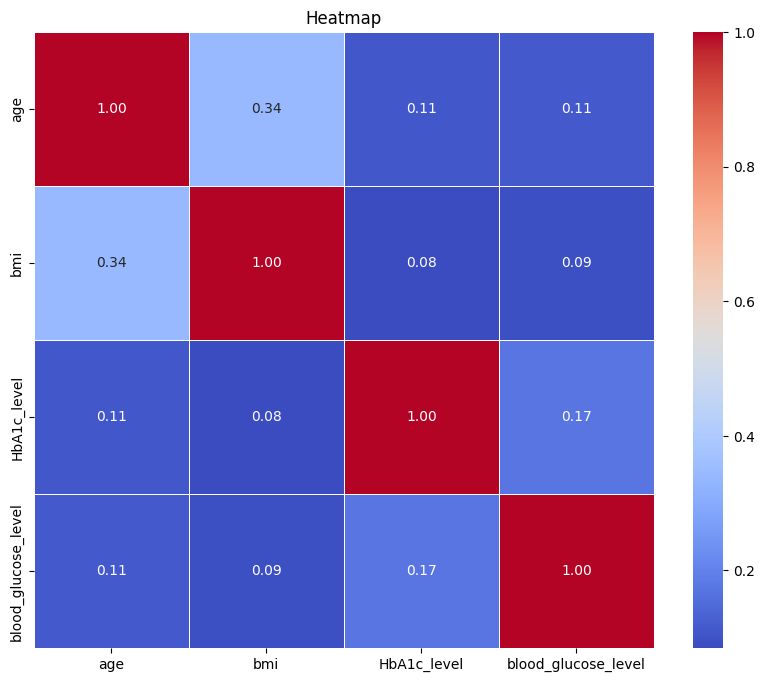

In [ ]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
correlation_matrix = data[numerical_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap')
plt.show()

In [ ]:
x=data.drop('diabetes',axis=1)
y=data['diabetes']

In [ ]:
x.shape[1]

8

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_val=sc.transform(x_val)

In [ ]:
from tensorflow.keras import layers,models
from tensorflow.keras.callbacks import EarlyStopping
model=models.Sequential()

In [ ]:
model.add(layers.Dense(10,activation="relu",input_shape=(x_train.shape[1],)))

model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(100,activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',patience=10)
history = model.fit(x_train, y_train,validation_data=(x_val, y_val),epochs=100,callbacks=[early_stopping],verbose=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9465 - loss: 0.1566 - val_accuracy: 0.9595 - val_loss: 0.1142
Epoch 2/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9600 - loss: 0.1110 - val_accuracy: 0.9648 - val_loss: 0.1003
Epoch 3/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9652 - loss: 0.0976 - val_accuracy: 0.9599 - val_loss: 0.1072
Epoch 4/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9669 - loss: 0.0949 - val_accuracy: 0.9672 - val_loss: 0.0945
Epoch 5/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9681 - loss: 0.0911 - val_accuracy: 0.9646 - val_loss: 0.0961
Epoch 6/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9689 - loss: 0.0899 - val_accuracy: 0.9691 - val_loss: 0.0946
Epoch 7/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9689 - loss: 0.0891 - val_accuracy: 0.9690 - val_loss: 0.0904
Epoch 8/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9686 - loss

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9574622984919396
[[17329   180]
 [  638  1083]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.86      0.63      0.73      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[LightGBM] [Info] Number of positive: 5072, number of negative: 52615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 57687, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.087923 -> initscore=-2.339266
[LightGBM] [Info] Start training from score -2.339266
[[17329   180]
 [  638  1083]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.86      0.63      0.73      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = classifier.score(x_test, y_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17446    63]
 [  533  1188]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.95      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



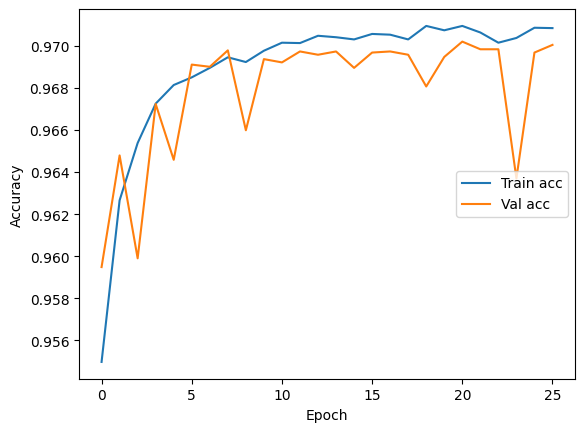

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.legend(['Train acc','Val acc','Train Loss','Val loss'],loc='center right')
plt.show()